In [1]:
import numpy
import matplotlib.pyplot as pyplot
from mpl_toolkits.mplot3d import Axes3D

In [2]:
xmin = 0.0
xmax = 1.0

ymin = 0.0
ymax = 1.0

nx = 20
ny = 20

dx = (xmax - xmin)/nx
dy = (ymax - ymin)/ny

x_edge = numpy.linspace(xmin,xmax,nx+1)
y_edge = numpy.linspace(ymin,ymax,ny+1)

x_center = numpy.linspace(xmin-dx/2,xmax+dx/2,nx+2)
y_center = numpy.linspace(ymin-dy/2,ymax+dy/2,ny+2)

x_mesh,y_mesh = numpy.meshgrid(x_edge,y_edge)
x_cell,y_cell = numpy.meshgrid(x_center,y_center)

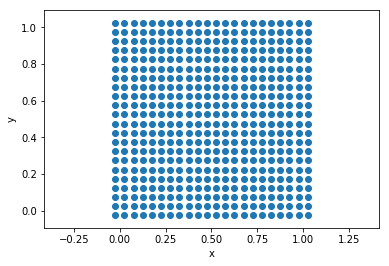

In [3]:
pyplot.figure()
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.scatter(x_cell,y_cell)
pyplot.axis('equal')
pyplot.show()

In [4]:
asol = numpy.sin(2 * numpy.pi * x_cell) * numpy.sin(2 * numpy.pi * y_cell)

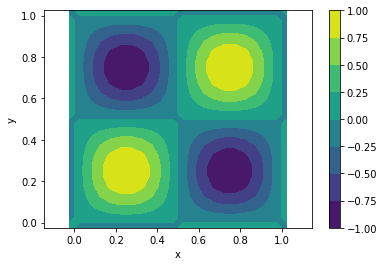

In [5]:
pyplot.figure()
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.contourf(x_cell, y_cell, asol)
pyplot.colorbar()
pyplot.axis('equal')
pyplot.show()

In [6]:
rvar = -8*numpy.pi*numpy.pi*numpy.sin(2 * numpy.pi * x_cell) * numpy.sin(2 * numpy.pi * y_cell)

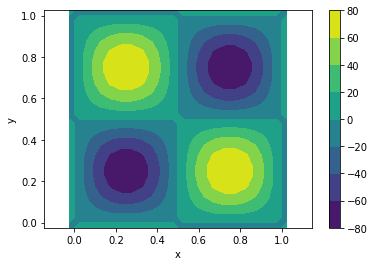

In [7]:
pyplot.figure()
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.contourf(x_cell, y_cell, rvar)
pyplot.colorbar()
pyplot.axis('equal')
pyplot.show()

In [8]:
ivar = numpy.zeros(numpy.shape(x_cell))

In [9]:
max_iterations = 5000
tol = 1e-9

iteration_counter = 0
residual = tol + 1.0

while iteration_counter < max_iterations and residual > tol:
    phi_old = numpy.copy(ivar)
    
    for j in range(1,ny+1):
        for i in range(1,nx+1):
            
            ivar[i,j] = (((phi_old[i, j-1]  +
                           phi_old[i, j+1]) * dy**2 +
                          (phi_old[i-1, j]  +
                           phi_old[i+1, j]) * dx**2 -
                           rvar[i,j] * dx**2 * dy**2)/
                          (2.0 * (dx**2 + dy**2)))
    
    ivar[0,:]  = -ivar[1,:]
    ivar[-1,:] = -ivar[-2,:]
    ivar[:,0]  = -ivar[:,1]
    ivar[:,-1] = -ivar[:,-2]
    
    residual = (numpy.sqrt(numpy.sum((ivar - phi_old)**2) / ((nx + 2) * (ny + 2))))
    
    iteration_counter = iteration_counter + 1

In [10]:
iteration_counter

339

In [11]:
residual

9.6985209167202496e-10

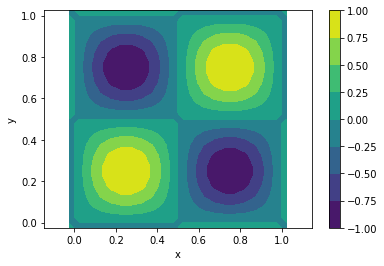

In [12]:
pyplot.figure()
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.contourf(x_cell, y_cell, ivar)
pyplot.colorbar()
pyplot.axis('equal')
pyplot.show()

In [13]:
error = abs(asol - ivar)

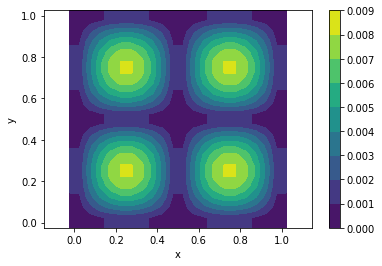

In [14]:
pyplot.figure()
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.contourf(x_cell, y_cell, error)
pyplot.colorbar()
pyplot.axis('equal')
pyplot.show()